In [60]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 
from IPython.display import Image

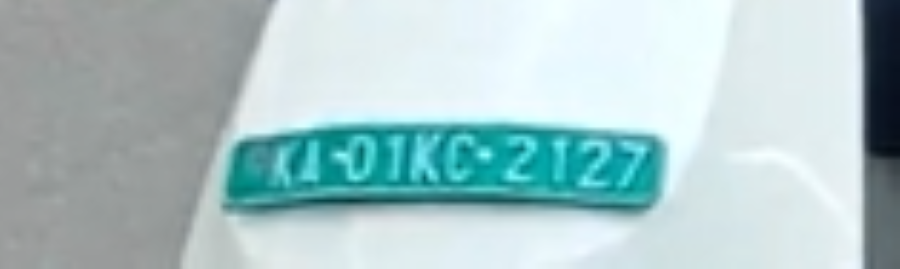

In [239]:
img_bgr = cv2.imread('Images/Nplate.png', cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
Image(filename = 'Images/Nplate.png')

```plaintext
Brightness and Darkness (addition)

there is a unioform addition or subtration on each and every pixel. 

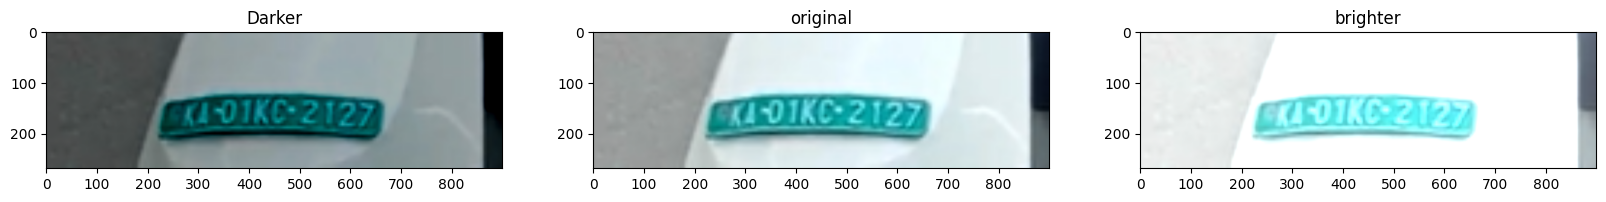

In [240]:
matrix = np.ones(img_rgb.shape, dtype='uint8') * 80

img_rgb_brighter = cv2.add(img_rgb, matrix)
img_rgb_darker = cv2.subtract(img_rgb, matrix)

plt.figure(figsize=(20,5))

plt.subplot(131); plt.imshow(img_rgb_darker);     plt.title('Darker');
plt.subplot(132); plt.imshow(img_rgb);            plt.title('original');
plt.subplot(133); plt.imshow(img_rgb_brighter);   plt.title('brighter');

```plaintext
contrast (Multiplication) 

the difference between the darkness and brightness increases 

eg - 
15   * 10 = 150
1.5  * 10 = 15

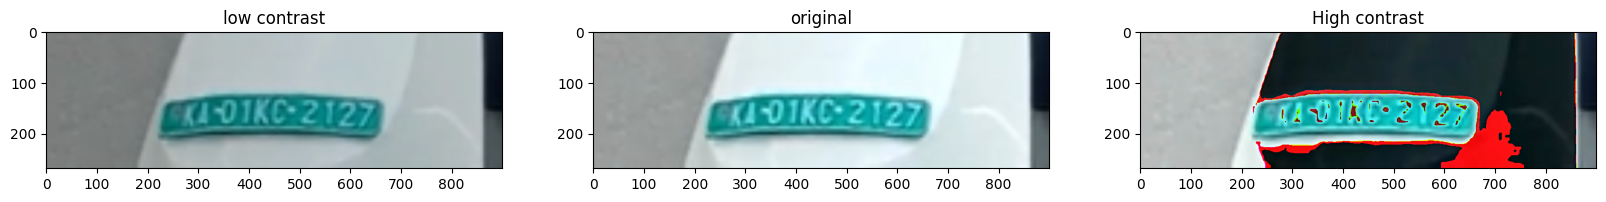

In [241]:
matrix1 = np.ones(img_rgb.shape) * 0.8
matrix2 = np.ones(img_rgb.shape) * 1.2

img_rgb_darker = np.uint8(cv2.multiply(np.float64(img_rgb), matrix1))
img_rgb_bright = np.uint8(cv2.multiply(np.float64(img_rgb), matrix2))

# show the image
plt.figure(figsize=(20,5))
plt.subplot(131); plt.imshow(img_rgb_darker);   plt.title('low contrast');
plt.subplot(132); plt.imshow(img_rgb);          plt.title('original');
plt.subplot(133); plt.imshow(img_rgb_bright);   plt.title('High contrast');

plt.show()

Text(0.5, 1.0, 'high contrast')

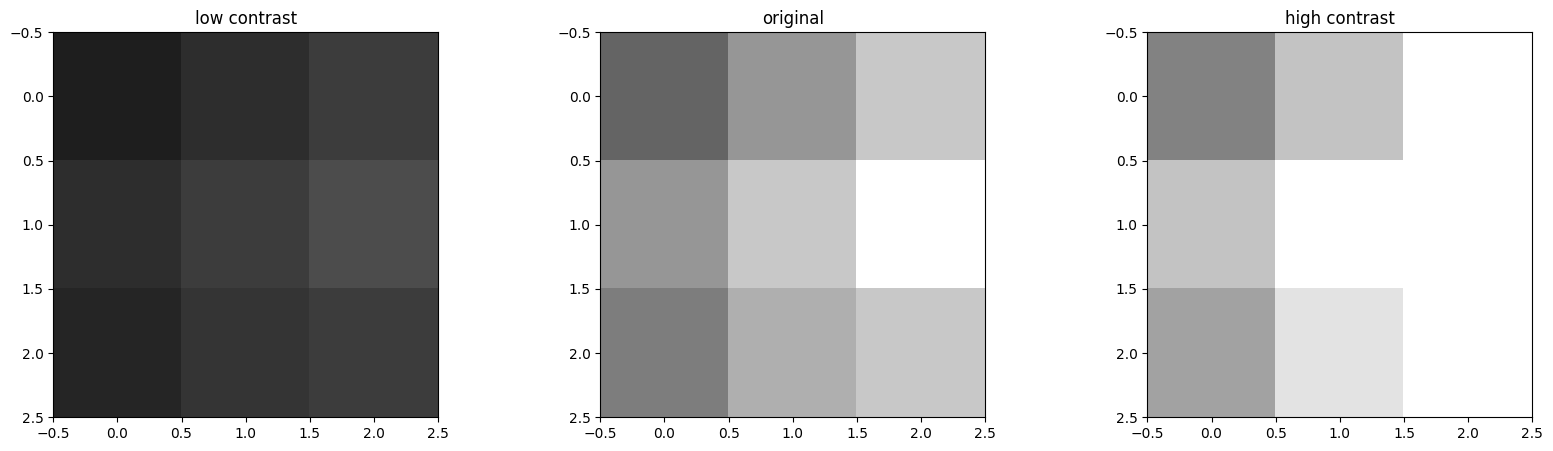

In [242]:
test_img = np.asarray([
    [[100, 100, 100], [150, 150, 150], [200, 200, 200]],
    [[150, 150, 150], [200, 200, 200], [255, 255, 255]],
    [[125, 125, 125], [175, 175, 175], [200, 200, 200]],
])

mat1 = np.ones((3,3,3)) * 0.3
mat2 = np.ones((3,3,3)) * 1.3


test_lowC = np.uint8(cv2.multiply(np.float64(test_img),  mat1))
# handling over flow
test_highC = np.uint8(np.clip(cv2.multiply(np.float64(test_img), mat2),0,255))

plt.figure(figsize=(20,5))
plt.subplot(131); plt.imshow(test_lowC);   plt.title('low contrast')
plt.subplot(132); plt.imshow(test_img);    plt.title('original')
plt.subplot(133); plt.imshow(test_highC);  plt.title('high contrast')

```plaintext

Image Threshold

Any value below the threshold is set to 0 and any above to 255 we are able to obtain a binary image

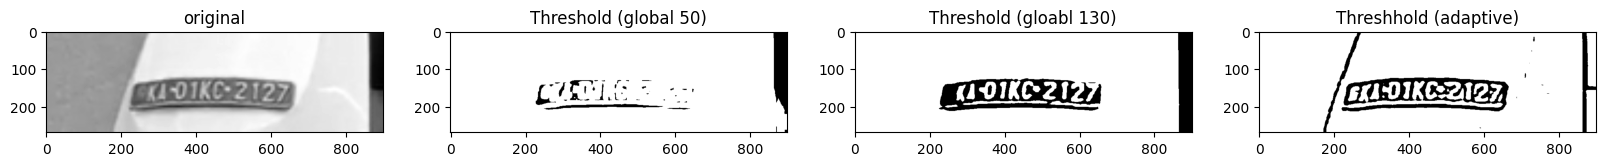

In [243]:
image = cv2.imread('Images/Nplate.png')

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# performing global threshold     - values above 100 will set to 255 others to 0
retval, img_thresh_gb1_1 = cv2.threshold(gray_image, 100, 255, cv2.THRESH_BINARY)

# performing global thresholding 
retval, img_thresh_gb1_2 = cv2.threshold(gray_image, 130, 255, cv2.THRESH_BINARY)

# performing adaptive thresholding - 255 max value, ADAPTIVE_THRESH_MEAN_C - using the mean method, THRESH_BINARY pixel set to 0 or 1 , 21(has to be odd) - (21X21), 7 - a constant for fine tuning the threshold
img_thresh_apd = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 23, 7)

plt.figure(figsize=[20,5])
plt.subplot(141); plt.imshow(gray_image, cmap='gray');       plt.title('original')
plt.subplot(142); plt.imshow(img_thresh_gb1_1, cmap='gray'); plt.title('Threshold (global 50)')
plt.subplot(143); plt.imshow(img_thresh_gb1_2, cmap='gray'); plt.title('Threshold (gloabl 130)')
plt.subplot(144); plt.imshow(img_thresh_apd, cmap='gray');   plt.title("Threshhold (adaptive)");


```plaintext

Bitwise Operations

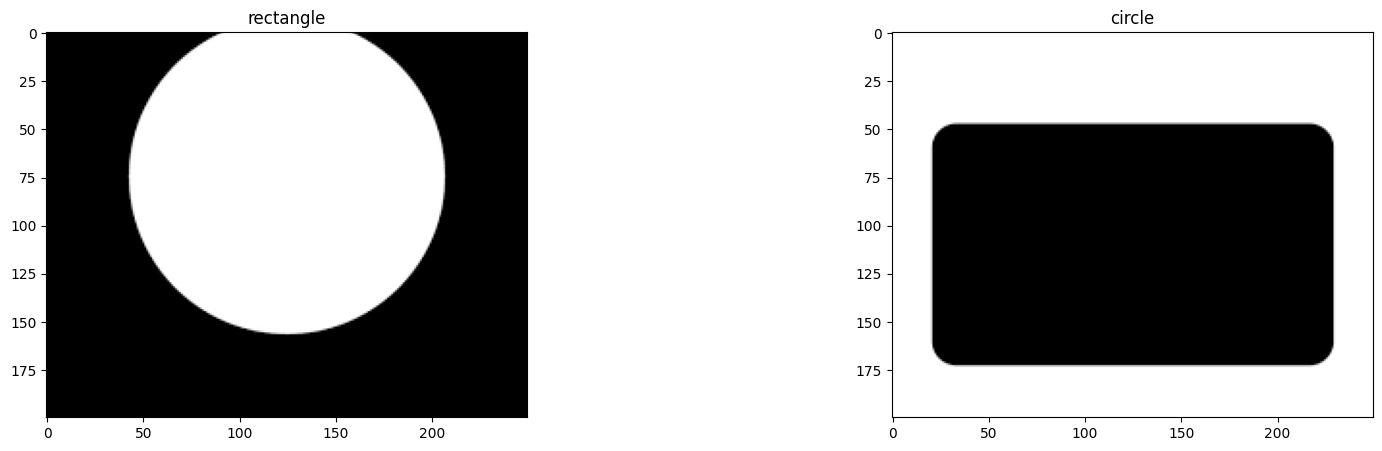

In [244]:
rect = cv2.imread('Images/circle.png')
circle = cv2.imread('Images/rectangle.png')

plt.figure(figsize=[20,5])
plt.subplot(121); plt.imshow(rect); plt.title("rectangle");
plt.subplot(122); plt.imshow(circle); plt.title('circle');

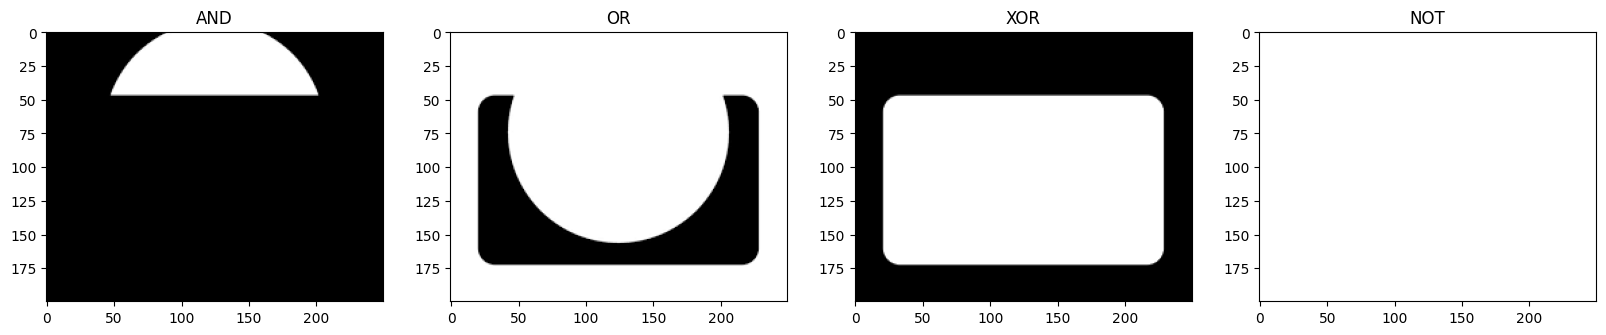

In [245]:
resultAnd  =  cv2.bitwise_and(rect, circle, mask = None)
resultOR   =  cv2.bitwise_or(circle, rect, mask=None)
resultXor  =  cv2.bitwise_not(circle, rect, mask=None)
resultNot  =  cv2.bitwise_xor(circle, rect, mask=None)

plt.figure(figsize=[20,5])
plt.subplot(141); plt.imshow(resultAnd); plt.title("AND");
plt.subplot(142); plt.imshow(resultOR);  plt.title("OR");
plt.subplot(143);  plt.imshow(resultXor); plt.title("XOR");
plt.subplot(144);  plt.imshow(resultNot); plt.title("NOT");